In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [4]:
size = 31000  ##############  初始成交额变化量  ####################

add_size = 10000  ##############  每次累加的成交额变化量  ####################

baseline = "RB99_1m_Turnover_"  ############### 保存文件的前缀 ##################


for _ in range(1):  ############# 循环次数 ############
    file_name = "../../数据下载/RB99_1m_2010.1.1_2025.1.31.csv"  ###############  原始数据文件 ############
    df = pd.read_csv(file_name)

    buf_o = []
    buf_h = []
    buf_l = []
    buf_c = []
    buf_v = []
    buf_pos1 = []
    buf_pos2 = []
    res = []

    pos_sum = 0

    for i in range(0, len(df)):
        p_t = df["datetime"].iloc[i]
        p_o = df["open"].iloc[i]
        p_h = df["high"].iloc[i]
        p_l = df["low"].iloc[i]
        p_c = df["close"].iloc[i]
        p_v = df["volume"].iloc[i]
        p_tt = df["total_turnover"].iloc[i]

        di = df.index.values[i]

        buf_o.append(p_o)
        buf_h.append(p_h)
        buf_l.append(p_l)
        buf_c.append(p_c)
        buf_v.append(p_v)

        pos_sum = pos_sum + (p_tt / 1000000)

        if pos_sum >= size:
            o = buf_o[0]
            h = max(buf_h)
            l = min(buf_l)
            c = buf_c[-1]
            v = sum(buf_v)
            p = pos_sum

            res.append(
                {
                    "eob": p_t,
                    "open": o,
                    "high": h,
                    "low": l,
                    "close": c,
                    "volume": v,
                    "pos": p,
                    "hang": di,
                }
            )

            buf_o = []
            buf_h = []
            buf_l = []
            buf_c = []
            buf_v = []
            pos_sum = 0

    aaa = pd.DataFrame(res)
    date = aaa["eob"] > "2023-01-01"  #### 测试集数量

    aaa.to_csv(
        "./temp/"
        + baseline
        + str(size)
        + "_"
        + str(len(aaa))
        + "_"
        + str(len(aaa[date]))
        + ".csv",
        index=False,
    )

    title_file = baseline + str(size) + "_" + str(len(aaa)) + "_" + str(len(aaa[date]))
    file_name1 = (
        "./temp/"
        + baseline
        + str(size)
        + "_"
        + str(len(aaa))
        + "_"
        + str(len(aaa[date]))
        + ".csv"
    )
    bars = pd.read_csv(file_name1)

    size = size + add_size  ######## 累加  ######

    bars.set_index("eob", inplace=True)

    returns_1 = np.log(bars["close"]).diff().dropna()
    returns_2 = np.log(bars["close"]).diff(periods=2).dropna()
    returns_3 = np.log(bars["close"]).diff(periods=3).dropna()
    returns_4 = np.log(bars["close"]).diff(periods=4).dropna()
    returns_5 = np.log(bars["close"]).diff(periods=5).dropna()

    standard_1 = (returns_1 - returns_1.mean()) / returns_1.std()
    standard_2 = (returns_2 - returns_2.mean()) / returns_2.std()
    standard_3 = (returns_3 - returns_3.mean()) / returns_3.std()
    standard_4 = (returns_4 - returns_4.mean()) / returns_4.std()
    standard_5 = (returns_5 - returns_5.mean()) / returns_5.std()

    plt.figure(figsize=(16, 12))

    sns.kdeplot(standard_1, label="1", color="darkred")
    sns.kdeplot(standard_2, label="2", color="green")
    sns.kdeplot(standard_3, label="3", color="blue")
    sns.kdeplot(standard_4, label="4", color="orange")
    sns.kdeplot(standard_5, label="5", color="magenta")

    sns.kdeplot(
        np.random.normal(size=1000000), label="Normal", color="black", linestyle="--"
    )

    plt.xticks(range(-5, 6))
    plt.legend(loc=8, ncol=5)
    plt.title(
        title_file,
        loc="center",
        fontsize=20,
        fontweight="bold",
        fontname="Times New Roman",
    )
    plt.xlim(-5, 5)
    plt.grid(1)
    # plt.show()

    plt.savefig(file_name1 + ".jpg")
    plt.close()

In [34]:
def plot_bar(array: np.ndarray):
    ret = array[1:, 3] / array[:-1, 3] - 1
    standard = (ret - ret.mean()) / ret.std()
    plt.figure(figsize=(16, 12))
    sns.kdeplot(standard, label="bar", color="blue")
    sns.kdeplot(
        np.random.normal(size=1000000), label="Normal", color="black", linestyle="--"
    )
    plt.xticks(range(-5, 6))
    plt.legend(loc=8, ncol=5)
    plt.title(
        f"bar_{array.shape[0]}",
        loc="center",
        fontsize=20,
        fontweight="bold",
        fontname="Times New Roman",
    )
    plt.xlim(-5, 5)
    plt.grid(1)
    plt.show()


In [5]:
import pandas as pd

df = pd.read_csv("../../数据下载/RB99_1m_2010.1.1_2025.1.31.csv")

In [7]:
df.head()

,order_book_id,datetime,trading_date,open,volume,close,high,total_turnover,open_interest,low
0,RB99,2010-01-04 09:01:00,2010-01-04,4454.0117,23256.0,4465.1785,4469.8147,1.053535e+09,1388598.0,4452.4814
1,RB99,2010-01-04 09:02:00,2010-01-04,4464.4901,17134.0,4457.7571,4464.5734,7.750187e+08,1388476.0,4454.8645
2,RB99,2010-01-04 09:03:00,2010-01-04,4458.7597,15582.0,4466.6303,4468.3479,7.064969e+08,1389250.0,4458.7597
3,RB99,2010-01-04 09:04:00,2010-01-04,4467.2535,12374.0,4460.8297,4467.3158,5.580921e+08,1392774.0,4460.1706
4,RB99,2010-01-04 09:05:00,2010-01-04,4460.8984,7888.0,4464.3172,4466.3234,3.566685e+08,1393822.0,4459.7219


In [66]:
threshold = 0.1
first_element_index = 0
bar = np.array([0, 0, 0, 0, 0])
datetime = []
is_new_bar = False

array = df[["open", "high", "low", "close", "volume", "datetime"]].to_numpy()
new_bar_array = []
for idx, _ in enumerate(array):
    if idx == 0:
        bar[0] = array[idx, 0]
        bar[1] = array[idx, 1]
        bar[2] = array[idx, 2]
        bar[3] = array[idx, 3]
        bar[4] = array[idx, 4]
        datetime.append(array[idx, 5])
    else:
        if is_new_bar:
            bar = np.array([0, 0, 0, 0, 0])
            bar[0] = array[idx, 0]
            bar[1] = array[idx, 1]
            bar[2] = array[idx, 2]
            bar[3] = array[idx, 3]
            bar[4] = array[idx, 4]
            datetime.append(array[idx, 5])
            first_element_index = idx
            is_new_bar = False
        else:
            bar[1] = np.max([bar[1], array[idx, 1]])
            bar[2] = np.min([bar[2], array[idx, 2]])
            bar[3] = array[idx, 3]
            bar[4] += array[idx, 4]
            close_array = array[first_element_index:idx, 3]
            ret_array = close_array[1:] / close_array[:-1] - 1
            if np.sum(np.abs(ret_array)) > threshold:
                is_new_bar = True
                new_bar_array.append(bar)

new_bar_array = np.array(new_bar_array)
new_bar_array.shape

(5535, 5)

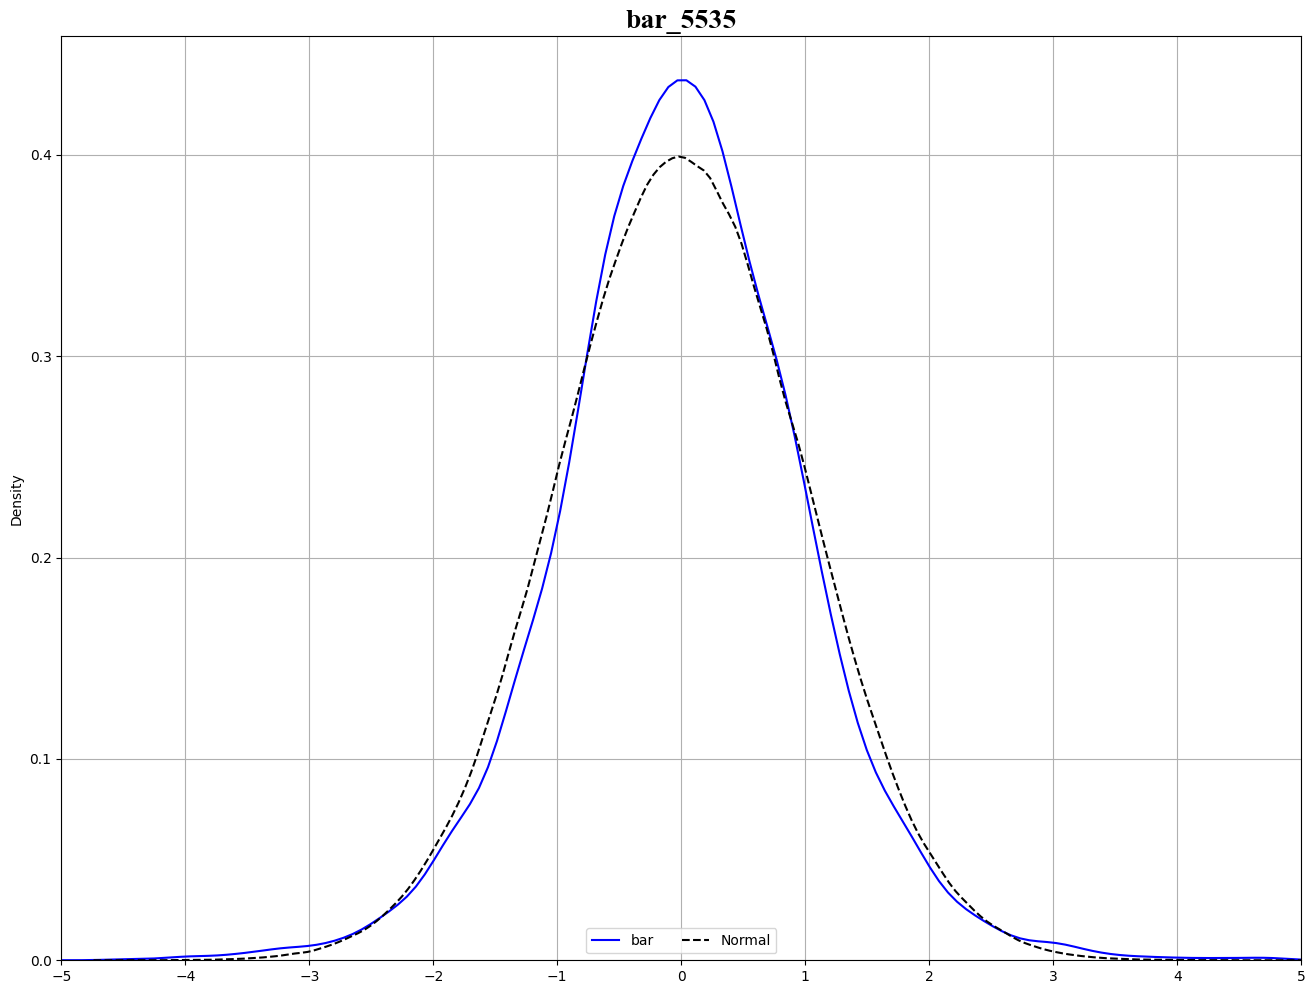

In [67]:
plot_bar(new_bar_array)

In [68]:
df_label = pd.DataFrame(
    new_bar_array, columns=["open", "high", "low", "close", "volume"]
)
df_label["eob"] = datetime[:-1]
df_label.to_csv("bar_label.csv", index=False)

In [69]:
def get_percentiles(array: np.ndarray):
    sorted_indices = np.argsort(array)
    ranks = np.empty_like(sorted_indices)
    ranks[sorted_indices] = np.arange(len(array))
    percentiles = ranks / (len(array) - 1)
    return percentiles


percentiles = get_percentiles(df["close"].to_numpy())
percentiles

array([0.8620181 , 0.86078231, 0.86223999, ..., 0.29937009, 0.29946306,
       0.30031557])

In [41]:
from scipy.stats import norm


def map_to_norm(percentiles: np.ndarray):
    normal_values = norm.ppf(percentiles, loc=0, scale=1)
    return normal_values


norm_values = map_to_norm(percentiles)
norm_values

array([ 1.08943113,  1.08384082,  1.09043854, ..., -0.52621306,
       -0.52594543, -0.52349312])

In [44]:
df_new = df[["open", "high", "low", "close", "volume"]].copy()
df_new["return"] = df_new["close"].shift(1) / df_new["close"] - 1
df_new = df_new.iloc[1:]
df_new.head()

,open,high,low,close,volume,return
1,4464.4901,4464.5734,4454.8645,4457.7571,17134.0,0.001665
2,4458.7597,4468.3479,4458.7597,4466.6303,15582.0,-0.001987
3,4467.2535,4467.3158,4460.1706,4460.8297,12374.0,0.001300
4,4460.8984,4466.3234,4459.7219,4464.3172,7888.0,-0.000781
5,4464.5226,4465.5194,4457.5972,4460.3560,11202.0,0.000888


In [46]:
from gplearn.genetic import SymbolicRegressor

model = SymbolicRegressor(
    function_set=["add", "sub", "sqrt", "log", "abs", "max", "min"],
    population_size=5000,
    stopping_criteria=0.01,
    max_samples=0.9,
    verbose=1,
    random_state=42,
)

x = df_new[["open", "high", "low", "close", "volume"]].to_numpy()
y = map_to_norm(get_percentiles(df_new["return"].to_numpy()))

mask = np.isfinite(y)

model.fit(x[mask], y[mask])

/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.13          2797.49       21         0.713909         0.715222     72.12m


KeyboardInterrupt: 

In [25]:
np.isfinite(np.max(y))

False